### Greenhouse Gas Emissions Project

Author: Peter La

Title: Predicting Trends in Greenhouse Gas Emissions

Date: May 4, 2025

Author: Peter la

Purpose: </br>
Unsupervised learning: Explore and analyze greenhouse gas emissions data to reveal hidden patterns or insights without predefined labels. </br>
Data visualization: Visualize emission trends across different countries.

Input: ghg_post_outlier.csv

Outputs:
    

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [2]:
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns;

warnings.filterwarnings("ignore")
%matplotlib inline
dpi = 300
sns.set()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import SpectralClustering

### Import Dataset

In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/ghg_data/ghg_post_outlier.csv')
df.sample(20)

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,country_ghg_avg,country_population_avg,country_gdp_avg
6100,CTT - Correios de Portugal SA,41342,2018,Portugal,Logistics - 3rd party,Intermodal transport & logistics,5.182797e+08,Third-party verification or assurance process ...,7.493170e+08,4.291207e+07,...,1.910320e+09,1.751827e+09,4.902148e+08,9.879929e+08,1.584928e+08,Business travel,9.00,54.959411,1.038898e+07,2.549309e+11
41356,Mahindra Lifespace Developer Limited,47918,2023,India,Real estate owners & developers,Land & property ownership & development,1.010603e+09,Third-party verification or assurance process ...,2.545080e+07,-2.053200e+07,...,5.955660e+08,3.708072e+08,1.121448e+08,1.052616e+08,2.247588e+08,Upstream transportation and distribution,279.73,3265.433643,1.410932e+09,3.105398e+12
17393,Fujitsu Limited,6874,2020,Japan,Other professional services,Specialized professional services,1.911762e+10,Third-party verification or assurance process ...,2.297409e+10,3.018739e+09,...,2.041732e+10,1.051713e+10,2.120237e+09,2.024480e+09,9.900192e+09,Upstream transportation and distribution,64000.00,1173.044363,1.258077e+08,4.772504e+12
35036,SK Hynix,8663,2022,South Korea,Electronic components,Electrical & electronic equipment,3.713316e+10,Third-party verification or assurance process ...,3.212753e+10,1.504857e+10,...,7.478749e+10,2.921830e+10,5.268325e+09,1.785001e+10,4.556919e+10,Downstream transportation and distribution,26832.00,672.358506,5.172400e+07,1.705162e+12
17454,Hitachi High-Tech Corporation,8391,2020,Japan,Electronic components,Electrical & electronic equipment,NaN,Third-party verification or assurance process ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Capital goods,86412.00,1173.044363,1.258077e+08,4.772504e+12
33524,Woolworths Holdings Ltd,20773,2022,South Africa,"Supermarkets, food & drugstores",Convenience retail,3.276236e+09,Third-party verification or assurance process ...,3.830098e+09,5.596800e+08,...,2.079031e+09,1.441918e+09,5.549100e+07,9.034380e+08,6.371130e+08,Upstream transportation and distribution,160233.00,549.172782,6.114104e+07,3.901730e+11
2496,"Advantech Co, Ltd.",21330,2018,China,Computer hardware,Electrical & electronic equipment,4.148617e+09,No third-party verification or assurance,1.510522e+09,2.673509e+08,...,1.362049e+09,4.462911e+08,1.156855e+08,4.432721e+06,9.157582e+08,Employee commuting,0.65,13105.528962,1.409865e+09,1.632198e+13
68,Barratt Developments plc,23046,2018,United Kingdom,Residential building construction,Construction,6.017675e+09,Third-party verification or assurance process ...,6.049137e+09,1.152398e+09,...,9.353804e+09,3.170174e+09,2.400300e+08,1.699768e+09,6.183630e+09,Fuel-and-energy-related activities (not includ...,827.00,428.766726,6.734692e+07,3.038320e+12
5324,Brambles,2116,2018,Australia,Finished wood products,Wood & rubber products,1.581643e+10,No third-party verification or assurance,4.119560e+09,1.173389e+09,...,5.769784e+09,3.442291e+09,3.709856e+07,1.831594e+09,2.327493e+09,Downstream transportation and distribution,832910.00,545.079369,2.582139e+07,1.553189e+12
15061,"Zimmer Biomet Holdings, Inc.",21063,2020,USA,Medical equipment,Medical equipment & supplies,3.109392e+10,Third-party verification or assurance process ...,7.024500e+09,1.756000e+09,...,2.441770e+10,1.221830e+10,-7.904000e+08,8.126500e+09,1.220460e+10,Upstream transportation and distribution,2461.00,5260.920557,3.315243e+08,2.383859e+13


### Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44079 entries, 0 to 44078
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                44079 non-null  object 
 1   account_id                  44079 non-null  int64  
 2   Year                        44079 non-null  int64  
 3   incorporated_country        44079 non-null  object 
 4   Primary activity            44079 non-null  object 
 5   Primary sector              44079 non-null  object 
 6   Market_Cap_USD              37591 non-null  float64
 7   Third_party_verification    44055 non-null  object 
 8   Revenue_USD                 37799 non-null  float64
 9   ebitda_USD                  37799 non-null  float64
 10  grossProfit_USD             37799 non-null  float64
 11  netIncome_USD               37799 non-null  float64
 12  cashAndCashEquivalents_USD  37799 non-null  float64
 13  shortTermInvestments_USD    377

In [6]:
df = df.drop('account_name', axis=1)

In [7]:
df = df.drop('account_id', axis=1)

In [8]:
df = df.drop('Third_party_verification', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44079 entries, 0 to 44078
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        44079 non-null  int64  
 1   incorporated_country        44079 non-null  object 
 2   Primary activity            44079 non-null  object 
 3   Primary sector              44079 non-null  object 
 4   Market_Cap_USD              37591 non-null  float64
 5   Revenue_USD                 37799 non-null  float64
 6   ebitda_USD                  37799 non-null  float64
 7   grossProfit_USD             37799 non-null  float64
 8   netIncome_USD               37799 non-null  float64
 9   cashAndCashEquivalents_USD  37799 non-null  float64
 10  shortTermInvestments_USD    37799 non-null  float64
 11  longTermInvestments_USD     37799 non-null  float64
 12  totalAssets_USD             37799 non-null  float64
 13  totalLiabilities_USD        377

In [10]:
categorical_columns = ['incorporated_country', 'Primary activity', 'Primary sector', 'Scope_3_emissions_type']

In [11]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44079 entries, 0 to 44078
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        44079 non-null  int64  
 1   incorporated_country        44079 non-null  int64  
 2   Primary activity            44079 non-null  int64  
 3   Primary sector              44079 non-null  int64  
 4   Market_Cap_USD              37591 non-null  float64
 5   Revenue_USD                 37799 non-null  float64
 6   ebitda_USD                  37799 non-null  float64
 7   grossProfit_USD             37799 non-null  float64
 8   netIncome_USD               37799 non-null  float64
 9   cashAndCashEquivalents_USD  37799 non-null  float64
 10  shortTermInvestments_USD    37799 non-null  float64
 11  longTermInvestments_USD     37799 non-null  float64
 12  totalAssets_USD             37799 non-null  float64
 13  totalLiabilities_USD        377

In [13]:
df.describe()

,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Revenue_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,...,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,country_ghg_avg,country_population_avg,country_gdp_avg
count,44079.000000,44079.000000,44079.000000,44079.000000,3.759100e+04,3.779900e+04,3.779900e+04,3.779900e+04,3.779900e+04,3.779900e+04,...,3.779900e+04,3.779900e+04,3.779900e+04,3.779900e+04,3.779900e+04,44079.000000,4.407900e+04,43990.000000,4.407900e+04,4.407900e+04
mean,2020.691055,26.555412,66.727943,21.678123,4.213381e+10,1.550745e+10,3.166308e+09,7.154089e+09,1.522890e+09,6.245170e+09,...,6.555740e+10,4.921059e+10,1.647025e+10,1.205342e+10,1.140095e+10,7.686086,7.541206e+05,2020.043630,1.911141e+08,7.490542e+12
std,1.702396,12.186467,38.445461,15.316251,2.281083e+11,2.674943e+10,7.375009e+09,1.458088e+10,4.880889e+09,3.178626e+10,...,2.240724e+11,1.967959e+11,8.159429e+10,3.438719e+10,2.274114e+10,5.680386,3.302482e+06,2692.445035,2.930367e+08,8.835235e+12
min,2018.000000,0.000000,0.000000,0.000000,2.449135e+06,-1.711368e+10,-9.289400e+10,-2.699258e+10,-1.680588e+10,-9.736200e+09,...,0.000000e+00,0.000000e+00,-1.187800e+10,0.000000e+00,-1.073900e+10,0.000000,2.000000e-03,1.981020,6.453412e+04,7.583005e+09
25%,2019.000000,19.000000,36.000000,11.000000,2.869319e+09,2.993792e+09,4.154140e+08,9.290000e+08,1.197610e+08,3.564000e+08,...,5.155110e+09,2.608935e+09,8.980000e+07,9.701640e+08,1.831418e+09,3.000000,2.313000e+03,412.740377,5.172400e+07,1.553189e+12
50%,2021.000000,22.000000,69.000000,15.000000,8.135037e+09,7.527046e+09,1.141344e+09,2.388233e+09,4.490000e+08,9.460800e+08,...,1.283300e+10,7.357664e+09,4.866112e+08,3.253740e+09,4.474547e+09,7.000000,1.880000e+04,1173.044363,1.258077e+08,4.185212e+12
75%,2022.000000,40.000000,99.000000,30.000000,2.539696e+10,1.705968e+10,2.941382e+09,6.388800e+09,1.285750e+09,2.580339e+09,...,3.553965e+10,2.197100e+10,2.151878e+09,9.387576e+09,1.111567e+10,13.000000,1.590010e+05,3265.433643,3.315243e+08,4.772504e+12
max,2023.000000,41.000000,132.000000,56.000000,6.283032e+12,3.943280e+11,1.305410e+11,1.740620e+11,9.980300e+10,7.408340e+11,...,3.875393e+12,3.547515e+12,1.528885e+12,7.756765e+11,3.278780e+11,16.000000,5.199799e+07,13105.528962,1.410932e+09,2.383859e+13


In [14]:
df.to_csv('/content/drive/MyDrive/ghg_data/prepped_ghg_post_outlier.csv', index=False)

In [15]:
df = pd.read_csv(r'/content/drive/MyDrive/ghg_data/prepped_ghg_post_outlier.csv')

In [16]:
path = '/content/drive/MyDrive/ghg_data/'

### Exploratory Data Analysis

In [17]:
correlation_matrix = df.corr()
correlation_matrix

,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Revenue_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,...,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,country_ghg_avg,country_population_avg,country_gdp_avg
Year,1.000000,0.008779,-0.005042,0.001983,0.019901,0.046018,0.019500,0.018593,0.027666,0.016051,...,-0.001497,-0.004400,-0.033021,0.019739,0.016273,0.012066,-0.002219,0.010786,0.010250,0.008886
incorporated_country,0.008779,1.000000,-0.004827,-0.018525,0.034719,0.163859,0.158383,0.172748,0.157161,0.053527,...,0.082387,0.068329,0.069726,0.103904,0.126844,-0.011439,0.017445,0.152371,-0.075158,0.475840
Primary activity,-0.005042,-0.004827,1.000000,0.104120,0.048052,0.038431,0.035148,-0.001896,-0.023934,-0.182591,...,-0.197773,-0.185876,-0.171051,-0.128607,-0.070329,-0.001545,-0.018003,-0.024553,-0.020145,-0.017333
Primary sector,0.001983,-0.018525,0.104120,1.000000,0.055384,-0.022643,-0.033662,-0.068528,-0.040495,-0.074354,...,-0.086859,-0.081188,-0.074270,-0.067458,-0.065483,0.001811,0.011635,-0.043798,-0.023095,-0.028834
Market_Cap_USD,0.019901,0.034719,0.048052,0.055384,1.000000,0.335047,0.444332,0.343089,0.481369,0.061144,...,0.096828,0.079414,0.086443,0.129812,0.262406,-0.004173,0.021508,0.077631,0.063450,0.108339
Revenue_USD,0.046018,0.163859,0.038431,-0.022643,0.335047,1.000000,0.745652,0.807533,0.693545,0.196982,...,0.323844,0.293384,0.258973,0.413216,0.600536,-0.005935,0.112621,0.194649,0.106349,0.282908
ebitda_USD,0.019500,0.158383,0.035148,-0.033662,0.444332,0.745652,1.000000,0.750782,0.896584,0.234139,...,0.365627,0.322592,0.292390,0.464231,0.703453,-0.007202,0.068523,0.177995,0.096702,0.256194
grossProfit_USD,0.018593,0.172748,-0.001896,-0.068528,0.343089,0.807533,0.750782,1.000000,0.739289,0.360192,...,0.545893,0.510130,0.484086,0.549606,0.746066,-0.008676,0.043227,0.164195,0.072473,0.267535
netIncome_USD,0.027666,0.157161,-0.023934,-0.040495,0.481369,0.693545,0.896584,0.739289,1.000000,0.273935,...,0.381150,0.346595,0.331754,0.412623,0.651333,-0.009315,0.044993,0.179881,0.102761,0.251715
cashAndCashEquivalents_USD,0.016051,0.053527,-0.182591,-0.074354,0.061144,0.196982,0.234139,0.360192,0.273935,1.000000,...,0.855005,0.821379,0.681959,0.749908,0.591167,-0.010439,-0.016576,0.031967,0.007743,0.061831


Let's look at average emissions trend per year.

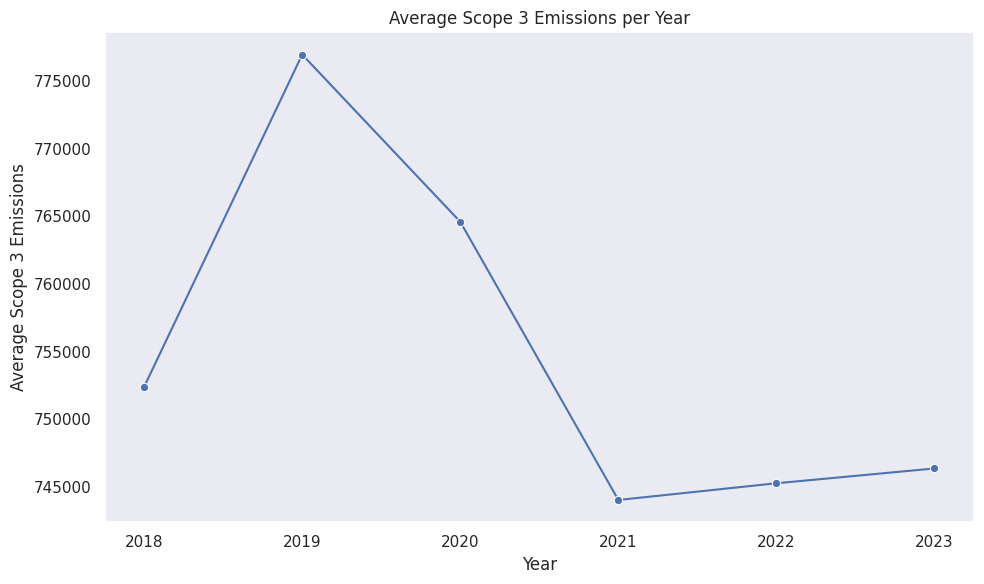

In [18]:
# Calculate average emissions per year
avg_emissions_per_year = df.groupby('Year')['Scope_3_emissions_amount'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_emissions_per_year, x='Year', y='Scope_3_emissions_amount', marker='o')
plt.title('Average Scope 3 Emissions per Year')
plt.xlabel('Year')
plt.ylabel('Average Scope 3 Emissions')
plt.grid(False)
plt.tight_layout()
plot_filename = 'linechart.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()


There is a gradual increase in average emissions over time from 2021 to 2023.  This upward pattern could reflect economic recovery or growth in high-emission sectors.

Let's look at the distribution of Scope 3 Emissions with a histogram to understand the distribution and potential skewness.

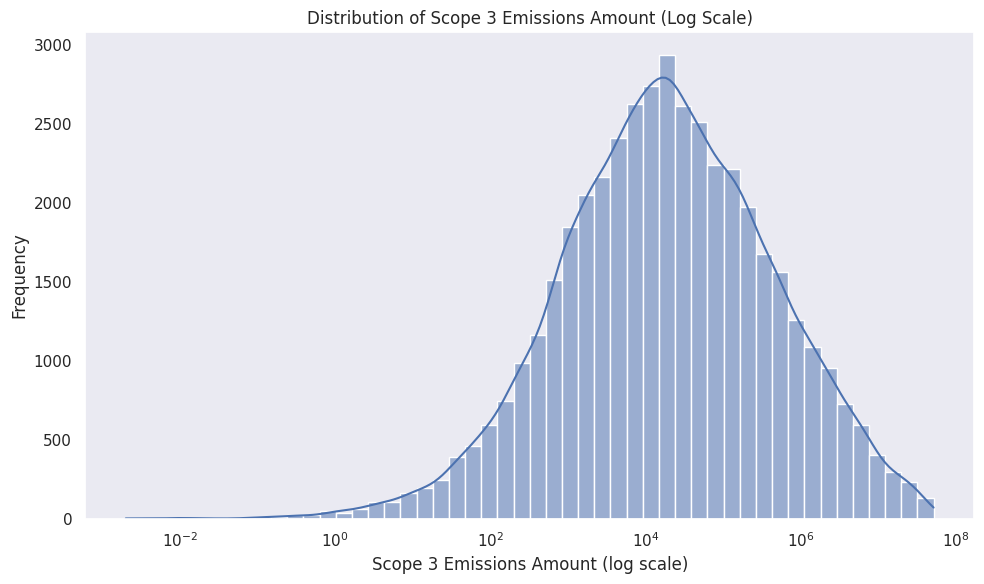

In [19]:
# Histogram for Scope 3 Emissions distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Scope_3_emissions_amount'], bins=50, kde=True, log_scale=True)
plt.title('Distribution of Scope 3 Emissions Amount (Log Scale)')
plt.xlabel('Scope 3 Emissions Amount (log scale)')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plot_filename = 'emissiondistribution.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()

Linear scale is useful when you're interested in absolute values and the spread is moderate. However, for datasets like this with large variation, the log scale is more informative for highlighting underlying relationships.

Text(0, 0.5, 'Scope 3 Emissions (log scale)')

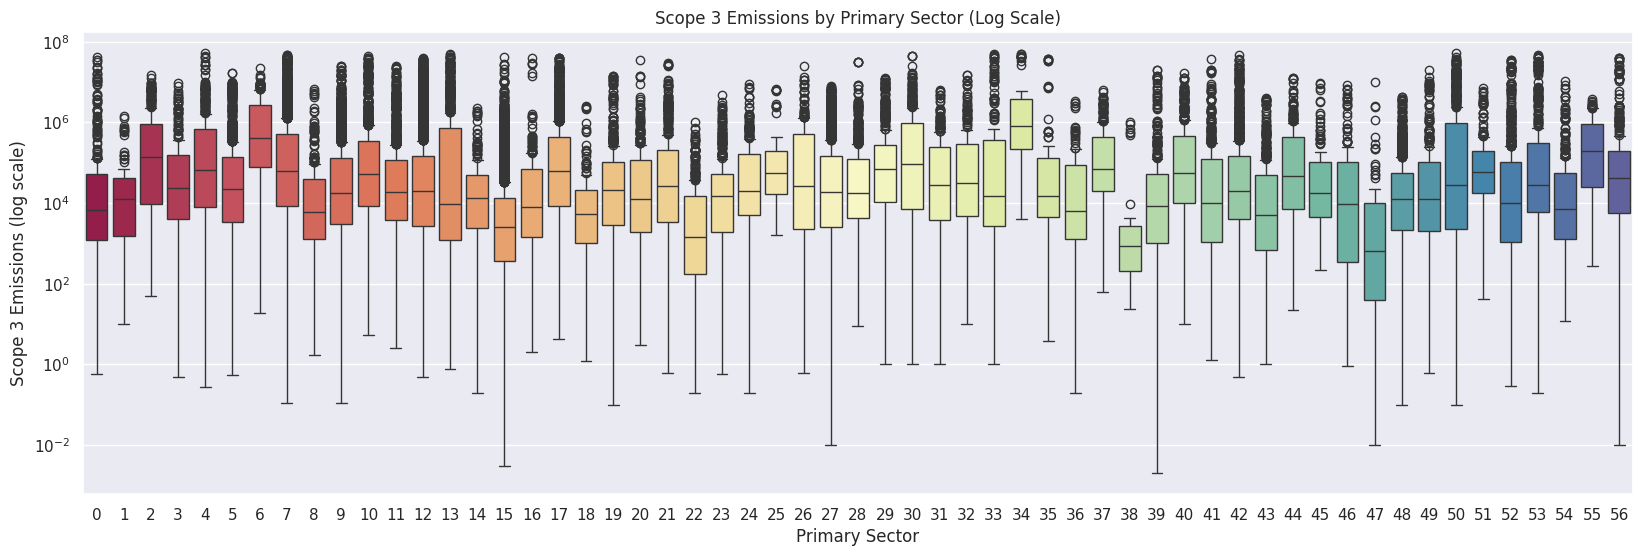

In [20]:
# Setup subplots
fig, axes = plt.subplots(figsize=(20, 6))

# Boxplot of emissions by Primary Sector
sns.boxplot(x='Primary sector', y='Scope_3_emissions_amount', data=df, palette="Spectral")
axes.set_yscale('log')
axes.set_title('Scope 3 Emissions by Primary Sector (Log Scale)')
axes.set_xlabel('Primary Sector')
axes.set_ylabel('Scope 3 Emissions (log scale)')

Some sectors display significantly higher median emissions and a broader range, indicating that emissions are strongly sector-dependent.

In [21]:
plot_filename = 'boxplots.png'
fig.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)

Let's break down the emissions by sector over time to pinpoint specific contributors.

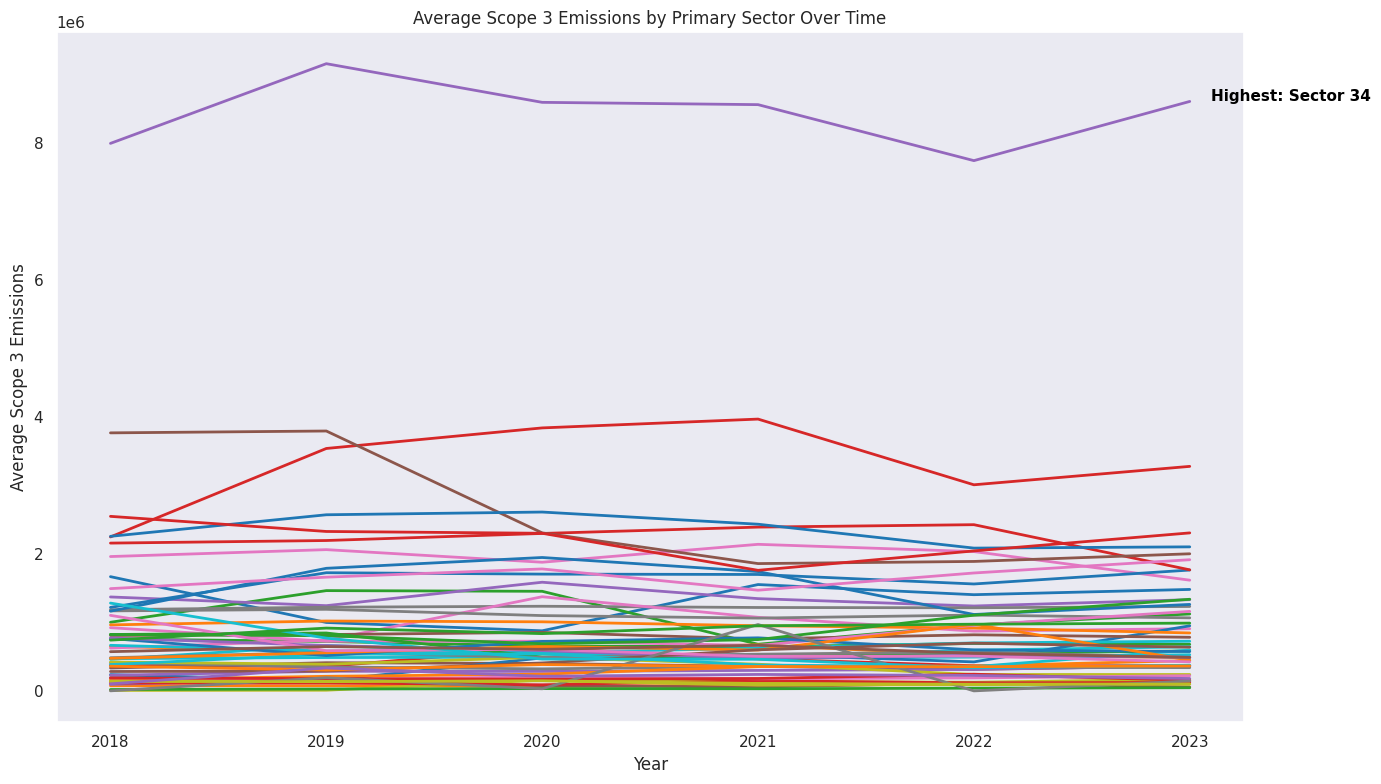

In [22]:
# Group by year and primary sector to calculate average emissions per sector over time
sector_emissions_over_time = df.groupby(['Year', 'Primary sector'])['Scope_3_emissions_amount'].mean().reset_index()
sector_avg_emissions = sector_emissions_over_time.groupby('Primary sector')['Scope_3_emissions_amount'].mean()
highest_emission_sector = sector_avg_emissions.idxmax()

# Plot the line chart with multiple lines, one for each sector
plt.figure(figsize=(14, 8))
plot = sns.lineplot(
    data=sector_emissions_over_time,
    x='Year',
    y='Scope_3_emissions_amount',
    hue='Primary sector',
    palette='tab10',
    linewidth=2,
    legend=False
)

# Annotate the sector with the highest average emissions
top_sector_data = sector_emissions_over_time[sector_emissions_over_time['Primary sector'] == highest_emission_sector]
top_latest_point = top_sector_data[top_sector_data['Year'] == top_sector_data['Year'].max()]
for _, row in top_latest_point.iterrows():
    plt.text(row['Year'] + 0.1, row['Scope_3_emissions_amount'], f'Highest: Sector {int(row["Primary sector"])}',
             color='black', fontsize=11, weight='bold')

plt.title('Average Scope 3 Emissions by Primary Sector Over Time')
plt.xlabel('Year')
plt.ylabel('Average Scope 3 Emissions')
plt.grid(False)
plt.tight_layout()
plot_filename = 'emissionsbysector.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()


The plot identifies a sector with the highest average emission rate over time. Looking back at the original dataset before preprocessing, sector 34 is oil & gas processing (refineries).

Let's plot a heatmap for all variables.

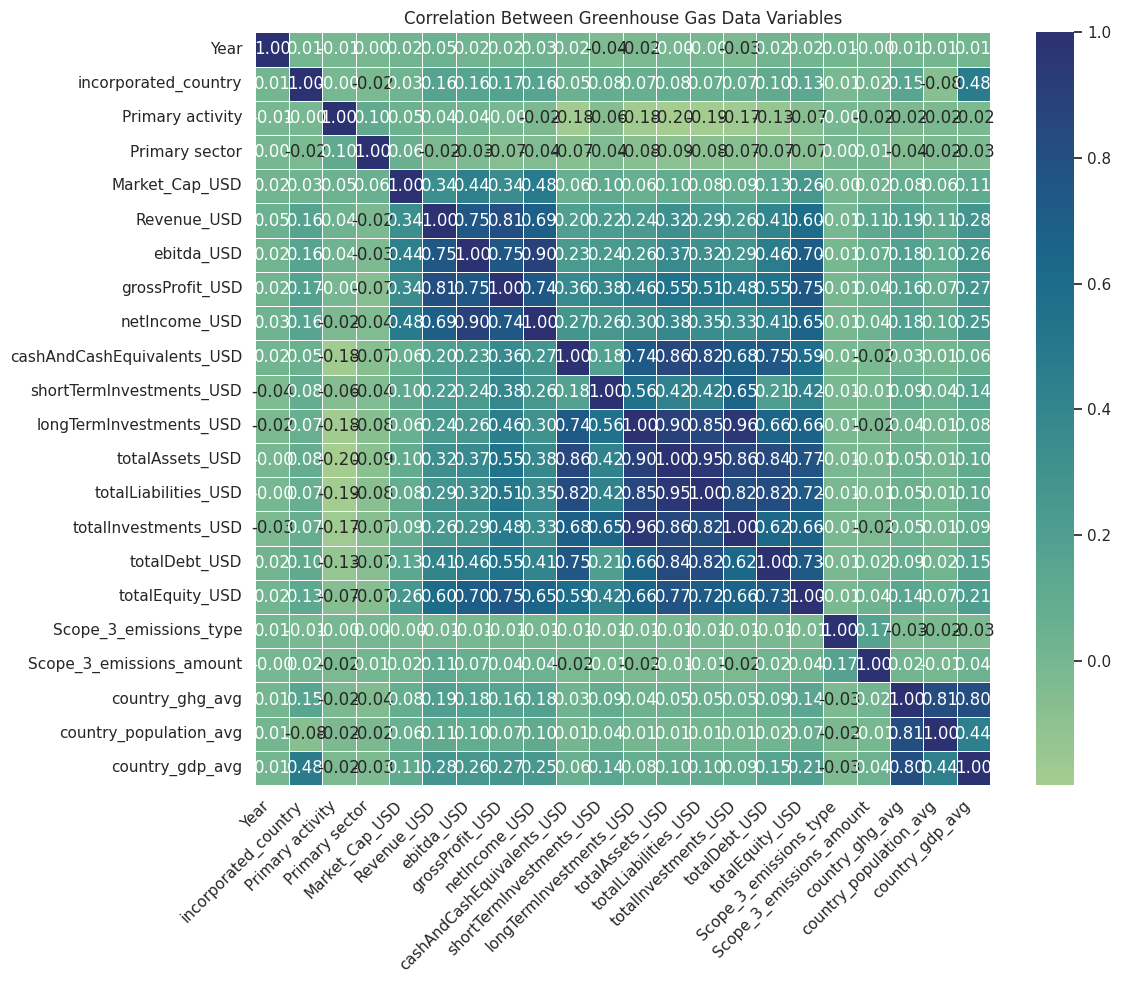

In [23]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', linewidths=0.5)
plt.title('Correlation Between Greenhouse Gas Data Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plot_filename = 'heatmap_allvariables.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()


Let's create a heatmap to specifically show correlations among financial metrics and emissions.

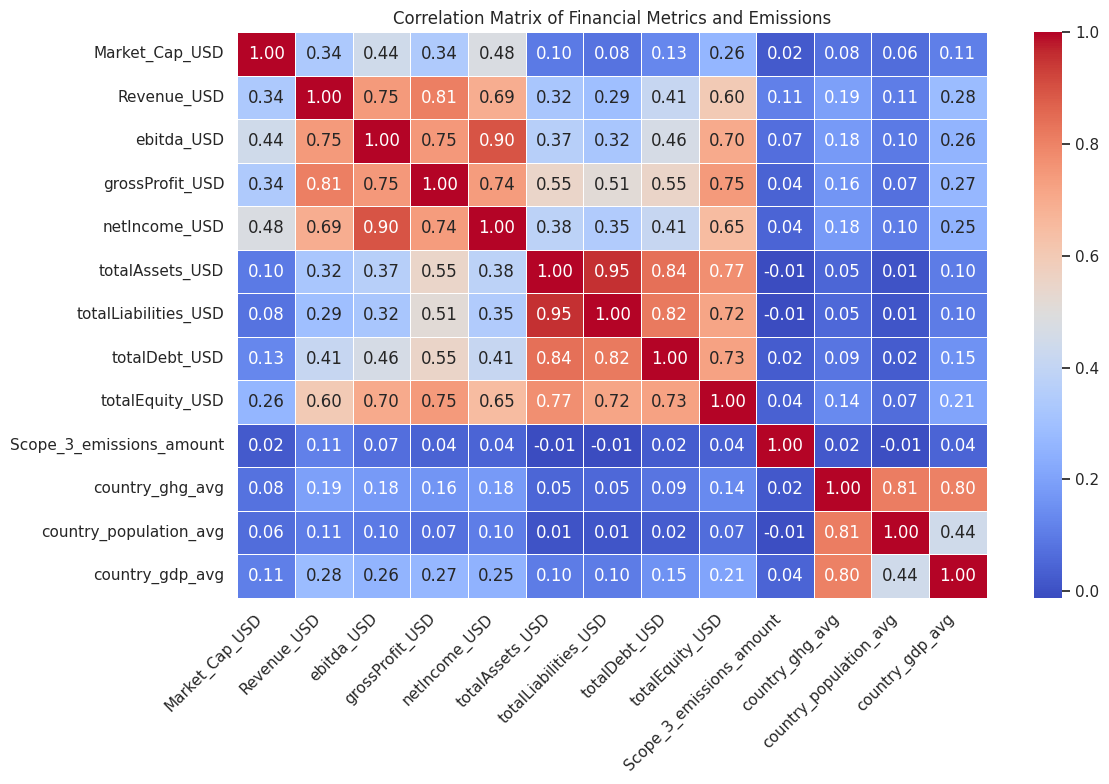

In [24]:
# Numerical columns for correlation analysis
numerical_columns = [
    'Market_Cap_USD', 'Revenue_USD', 'ebitda_USD', 'grossProfit_USD',
    'netIncome_USD', 'totalAssets_USD', 'totalLiabilities_USD',
    'totalDebt_USD', 'totalEquity_USD', 'Scope_3_emissions_amount',
    'country_ghg_avg', 'country_population_avg', 'country_gdp_avg'
]

# Compute correlation matrix
correlation_matrix_2 = df[numerical_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Financial Metrics and Emissions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plot_filename = 'financialmatrix.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()


There are strong positive correlations among financial metrics, are also strongly interrelated. Emissions (Scope_3_emissions_amount) have notably weak correlations with most financial metrics, suggesting emissions might be influenced by other factors. The country_ghg_avg variable strongly correlates with both country_population_avg and country_gdp_avg. That could indicates some relationship that could be explain with further analysis.

Based on this heatmap, we will select the relevant features for clustering analysis to identify groups of countries or companies based on their emissions profile.

In [43]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [44]:
# Select relevant features for clustering
features = [
    'Scope_3_emissions_amount', 'Market_Cap_USD', 'Revenue_USD', 'netIncome_USD',
    'totalAssets_USD', 'totalLiabilities_USD', 'totalDebt_USD',
    'country_population_avg', 'country_gdp_avg', 'country_ghg_avg'
]

# Drop rows with missing values in selected features
ghg_cluster_data = df[features].dropna()

In [45]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit(ghg_cluster_data)
scaled_data = scaled_data.transform(ghg_cluster_data)

In [46]:
scaled_data = pd.DataFrame(scaled_data,columns=ghg_cluster_data.columns)
scaled_data.head(10)

,Scope_3_emissions_amount,Market_Cap_USD,Revenue_USD,netIncome_USD,totalAssets_USD,totalLiabilities_USD,totalDebt_USD,country_population_avg,country_gdp_avg,country_ghg_avg
0,-0.235777,-0.143256,-0.518093,0.005147,-0.243434,-0.244543,-0.329586,-0.445088,-0.558198,-0.621104
1,-0.235764,-0.143256,-0.518093,0.005147,-0.243434,-0.244543,-0.329586,-0.445088,-0.558198,-0.621104
2,-0.235765,-0.143256,-0.518093,0.005147,-0.243434,-0.244543,-0.329586,-0.445088,-0.558198,-0.621104
3,-0.235042,-0.143256,-0.518093,0.005147,-0.243434,-0.244543,-0.329586,-0.445088,-0.558198,-0.621104
4,-0.235781,-0.143256,-0.518093,0.005147,-0.243434,-0.244543,-0.329586,-0.445088,-0.558198,-0.621104
5,-0.235658,-0.140442,-0.474115,-0.101353,-0.222058,-0.217825,-0.303117,-0.445088,-0.558198,-0.621104
6,-0.235383,-0.140442,-0.474115,-0.101353,-0.222058,-0.217825,-0.303117,-0.445088,-0.558198,-0.621104
7,-0.235778,-0.140442,-0.474115,-0.101353,-0.222058,-0.217825,-0.303117,-0.445088,-0.558198,-0.621104
8,-0.231213,-0.140442,-0.474115,-0.101353,-0.222058,-0.217825,-0.303117,-0.445088,-0.558198,-0.621104
9,-0.156851,-0.151221,-0.406456,-0.205239,-0.230013,-0.226196,-0.278675,-0.445088,-0.558198,-0.621104


In [66]:
# determine the optimal number of clusters
sum_sq= []

# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    print('Calculating for ',n,' clusters')

    model = KMeans(n_clusters=n, random_state=42)
    model.fit(scaled_data)
    sum_sq.append(-model.score(scaled_data))

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


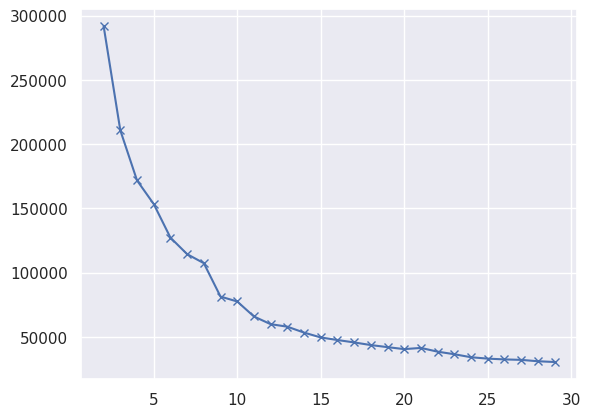

In [67]:
# make our scree plot to visually see the optimal number of clusters
plt.plot(range(2, 30), sum_sq, 'bx-')

As we can see from the above graph that there is turning like an elbow at k=9. So, I can say that the estimated number of clusters for the given datasets is 9. Then, I'm rerunning with the optimal k value and gather the predictions.

In [70]:
model = KMeans(n_clusters=9, random_state=42)
model.fit(scaled_data)

preds = model.predict(scaled_data)
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

I'm going to look at the silhouette score to evaluate this first model.

In [71]:
score = metrics.silhouette_score(scaled_data, preds)
score

np.float64(0.6593381745708327)

This high silhouette score generally indicates that the clusters are well-separated. Let's apply PCA to reduce dimensionality for visualization.

In [64]:
# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-means=9
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

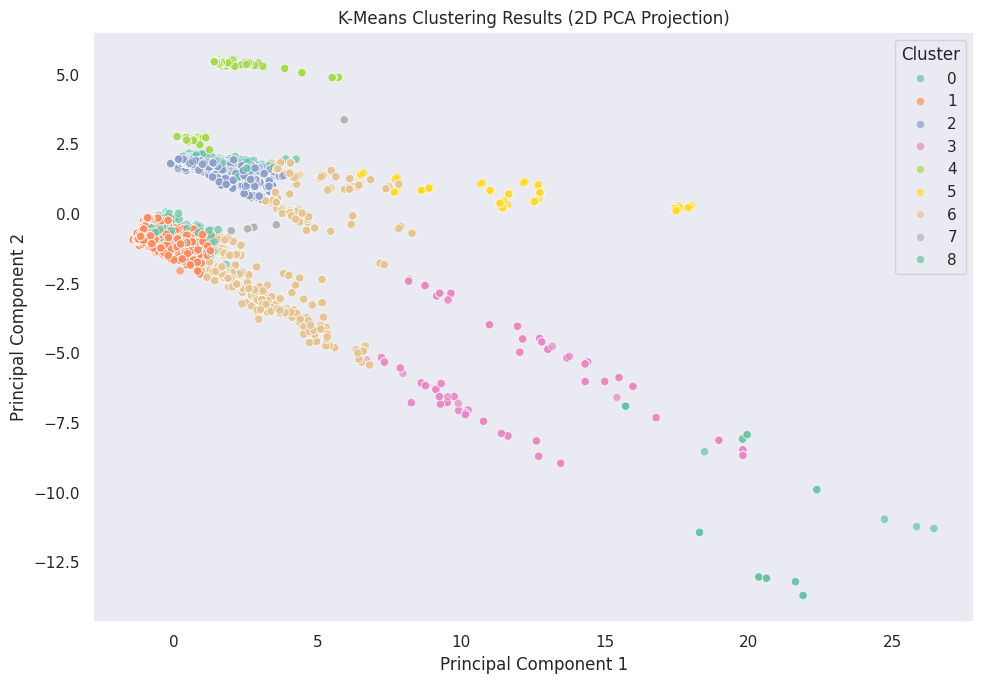

In [65]:
# Prepare data for visualization
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Visualize PCA results with cluster labels
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('K-Means Clustering Results (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(False)
plt.tight_layout()
plot_filename = 'kmeansclustering.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()

Although the elbow method indicates the number of optimal clusters is 9 in the dataset, I'm going to use the silhouette score to verify the the number of clusters.

In [72]:
for n in range (2,30):
    model2 = KMeans(n_clusters=n, random_state=42)
    model2.fit(scaled_data)

    preds = model2.predict(scaled_data)
    score = metrics.silhouette_score(scaled_data, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.8012690528452795
Silhouette score for  3  clusters:  0.5930245945000636
Silhouette score for  4  clusters:  0.6013132956209971
Silhouette score for  5  clusters:  0.6142822500008703
Silhouette score for  6  clusters:  0.634472182393597
Silhouette score for  7  clusters:  0.641633836115158
Silhouette score for  8  clusters:  0.6370134083023022
Silhouette score for  9  clusters:  0.6593381745708327
Silhouette score for  10  clusters:  0.6605174367193428
Silhouette score for  11  clusters:  0.6643582656726602
Silhouette score for  12  clusters:  0.599212377872185
Silhouette score for  13  clusters:  0.6005947172987682
Silhouette score for  14  clusters:  0.6347093567104329
Silhouette score for  15  clusters:  0.5740278734073804
Silhouette score for  16  clusters:  0.5588606390297911
Silhouette score for  17  clusters:  0.5476218747385615
Silhouette score for  18  clusters:  0.42612449493544313
Silhouette score for  19  clusters:  0.38402848389443295
S

Based on the result, it looks like 2 clusters and 11 clusters performed the best. I'm going to rerun the model with k=2 and k=11 values and gather the predictions. And just to confirm, I will also visualize them in a PCA plot.

In [73]:
model3 = KMeans(n_clusters=2, random_state=42)
model3.fit(scaled_data)

# gather the predictions
preds= model3.predict(scaled_data)

score = metrics.silhouette_score(scaled_data, preds)
score

np.float64(0.8012690528452795)

In [75]:
# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-means=2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

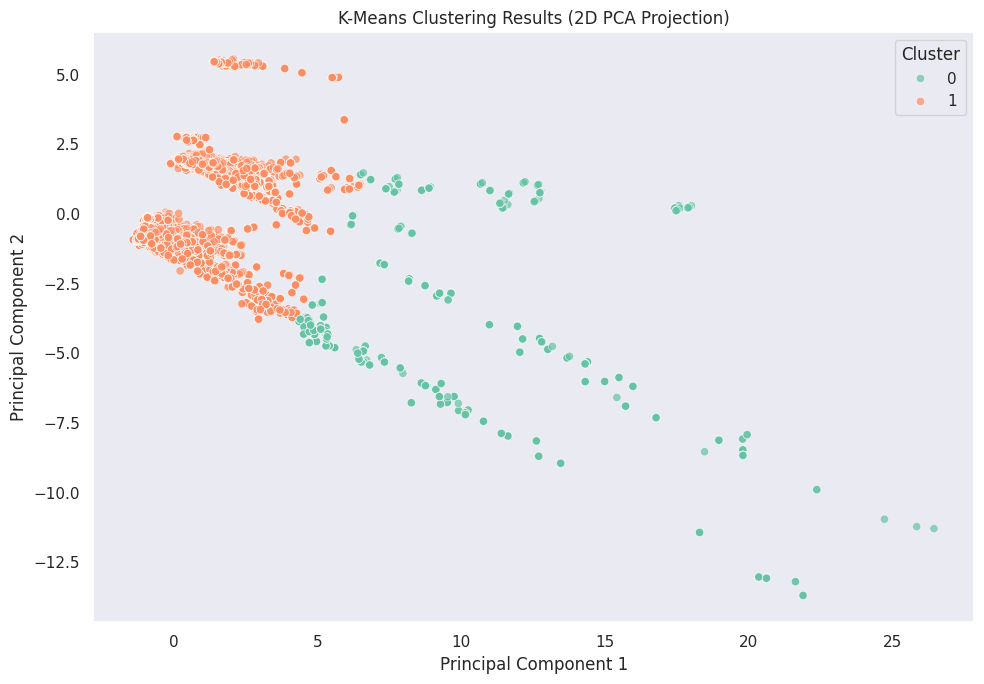

In [76]:
# Prepare data for visualization
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Visualize PCA results with cluster labels
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('K-Means Clustering Results (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(False)
plt.tight_layout()
plot_filename = 'kmeansclustering2.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [77]:
model4 = KMeans(n_clusters=11, random_state=42)
model4.fit(scaled_data)

# gather the predictions
preds= model4.predict(scaled_data)

score = metrics.silhouette_score(scaled_data, preds)
score

np.float64(0.6643582656726602)

In [78]:
# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-means=11
kmeans = KMeans(n_clusters=11, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

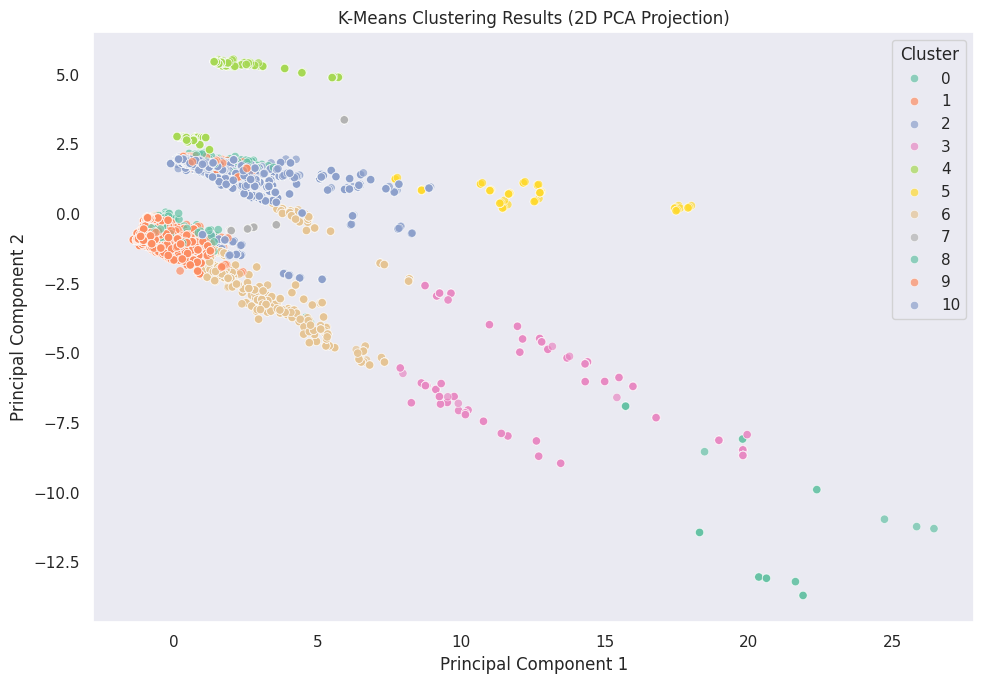

In [86]:
# Prepare data for visualization
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Visualize PCA results with cluster labels
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('K-Means Clustering Results (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(False)
plt.tight_layout()
plot_filename = 'kmeansclustering3.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [88]:
# Labeling the data points with Sector ID
pca_df['Sector_ID'] = df.loc[ghg_cluster_data.index, 'Primary sector']

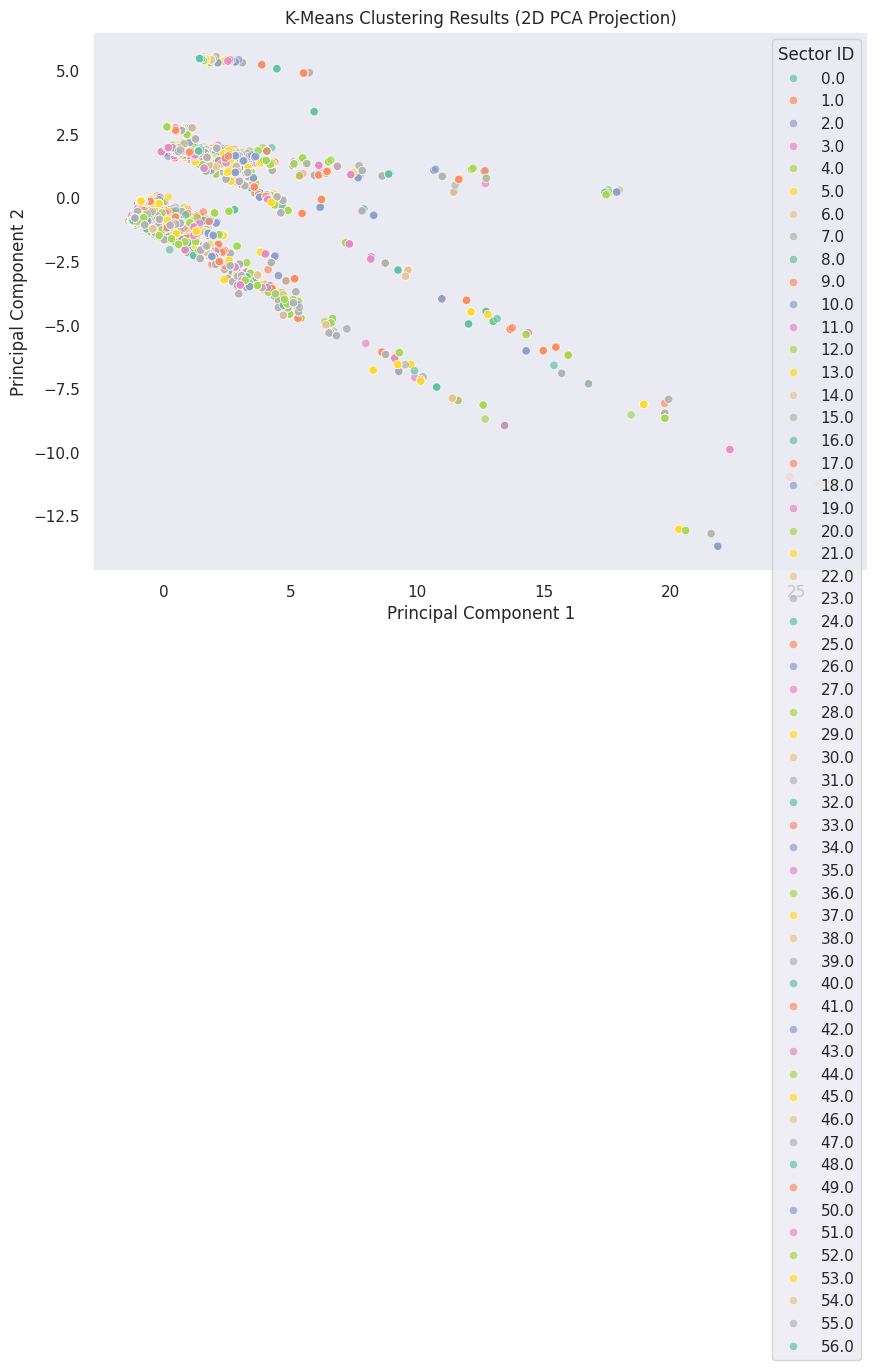

In [90]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Sector_ID', palette='Set2', alpha=0.7)
plt.title('K-Means Clustering Results (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sector ID')
plt.grid(False)
plt.tight_layout()
plot_filename = 'clusteringwithsectorid.png'
plt.savefig(path + plot_filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
plt.show()